In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/My Drive/air_pollution_data_with_aqi.csv")

**Data Exploration**

In [ ]:
data.head()

,City,Date,CO,NO,NO2,O3,SO2,PM 2.5,PM 10,NH3,AQI,AQI_Bucket
0,Ahmedabad,30-11-2020,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36,144.0,Moderate
1,Ahmedabad,01-12-2020,1682.28,7.71,54.84,0.73,21.70,120.95,154.53,27.36,301.0,Very Poor
2,Ahmedabad,02-12-2020,1815.80,16.54,49.35,0.17,23.84,133.47,172.63,28.12,310.0,Very Poor
3,Ahmedabad,03-12-2020,2296.45,41.57,40.10,0.00,35.76,150.37,202.15,36.48,323.0,Very Poor
4,Ahmedabad,04-12-2020,2189.64,23.92,58.95,0.02,28.13,160.79,205.80,40.53,331.0,Very Poor


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23504 entries, 0 to 23503
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        23504 non-null  object 
 1   Date        23504 non-null  object 
 2   CO          23504 non-null  float64
 3   NO          23504 non-null  float64
 4   NO2         23504 non-null  float64
 5   O3          23504 non-null  float64
 6   SO2         23504 non-null  float64
 7   PM 2.5      23504 non-null  float64
 8   PM 10       23504 non-null  float64
 9   NH3         23504 non-null  float64
 10  AQI         23504 non-null  float64
 11  AQI_Bucket  23504 non-null  object 
dtypes: float64(9), object(3)
memory usage: 2.2+ MB


In [ ]:
data.describe()

,CO,NO,NO2,O3,SO2,PM 2.5,PM 10,NH3,AQI
count,23504.000000,23504.00000,23504.000000,23504.000000,23504.000000,23504.000000,23504.000000,23504.000000,23504.000000
mean,1113.224543,6.00554,25.044104,35.059777,15.971449,98.598310,121.848091,12.060212,178.375170
std,1401.770372,24.50272,25.839242,31.901760,23.943464,135.572391,160.429589,17.544759,188.455736
min,173.570000,0.00000,0.310000,0.000000,0.190000,0.500000,0.580000,0.000000,10.000000
25%,447.270000,0.00000,8.740000,7.870000,4.470000,24.677500,32.277500,2.340000,52.000000
50%,700.950000,0.00000,16.450000,28.250000,7.990000,58.860000,75.775000,6.520000,106.000000
75%,1188.280000,0.27000,32.220000,54.360000,16.450000,117.605000,147.642500,15.830000,292.000000
max,23071.290000,457.76000,331.760000,406.270000,442.510000,2203.550000,2429.130000,352.620000,2899.000000


In [ ]:
data.isnull().sum()

City          0
Date          0
CO            0
NO            0
NO2           0
O3            0
SO2           0
PM 2.5        0
PM 10         0
NH3           0
AQI           0
AQI_Bucket    0
dtype: int64

In [ ]:
data.AQI_Bucket.unique()

array(['Moderate', 'Very Poor', 'Poor', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

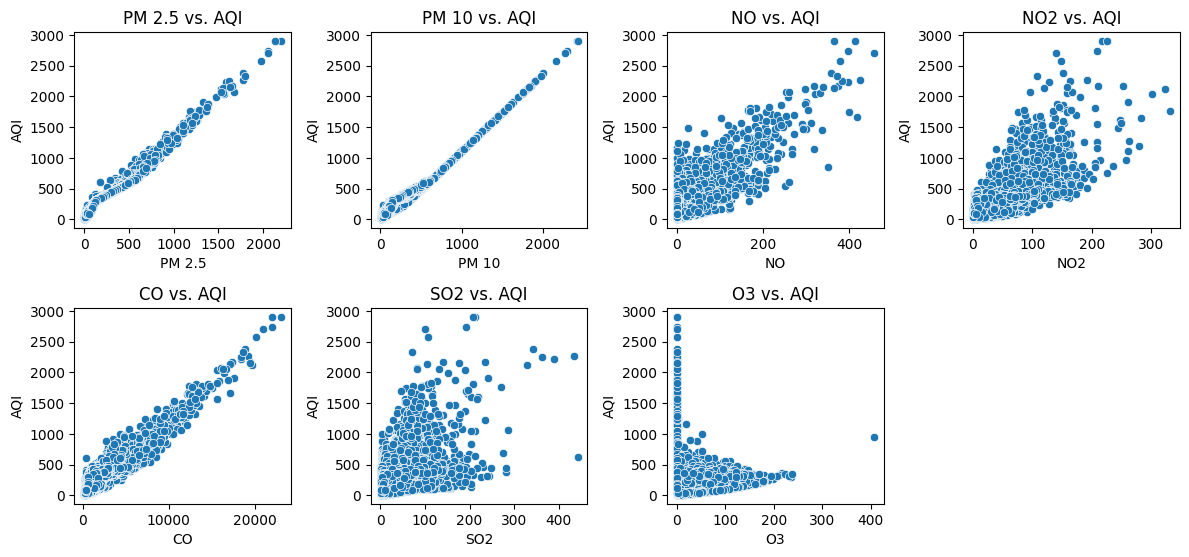

In [ ]:
#scatter plot
pollutants = ['PM 2.5', 'PM 10', 'NO', 'NO2', 'CO', 'SO2', 'O3']
plt.figure(figsize=(12, 8))
for i, pollutant in enumerate(pollutants):
    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=pollutant, y='AQI', data=data)
    plt.title(f'{pollutant} vs. AQI')
    plt.xlabel(pollutant)
    plt.ylabel('AQI')
plt.tight_layout()
plt.show()

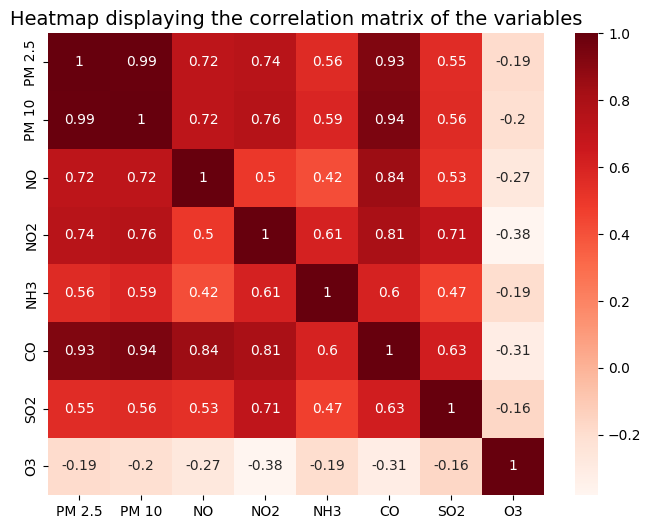

In [ ]:
plt.figure(figsize=(8,6))
correlation_data = data[['PM 2.5', 'PM 10', 'NO', 'NO2',
                         'NH3', 'CO', 'SO2', 'O3']]
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=14)
plt.show()

**Data Preprocessing**

In [ ]:
newdata = data.drop(['City','Date','AQI_Bucket'],axis=1)
newdata.head()

,CO,NO,NO2,O3,SO2,PM 2.5,PM 10,NH3,AQI
0,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36,144.0
1,1682.28,7.71,54.84,0.73,21.70,120.95,154.53,27.36,301.0
2,1815.80,16.54,49.35,0.17,23.84,133.47,172.63,28.12,310.0
3,2296.45,41.57,40.10,0.00,35.76,150.37,202.15,36.48,323.0
4,2189.64,23.92,58.95,0.02,28.13,160.79,205.80,40.53,331.0


In [ ]:
#removing outliers
import pandas as pd
import numpy as np
z_scores = np.abs((data['AQI'] - data['AQI'].mean()) / data['AQI'].std())
threshold = 2
df_cleaned = data[z_scores < threshold]
print(df_cleaned.shape)
percentage_outliers = ((len(data) - len(df_cleaned)) / len(data)) * 100
print(f"Percentage of outliers for AQI column based on z-score normalization: {percentage_outliers:.2f}%")

(22893, 12)
Percentage of outliers for AQI column based on z-score normalization: 2.60%


In [ ]:
#normalization and splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X=df_cleaned.drop(['AQI','City','Date','AQI_Bucket'],axis=1)
y=df_cleaned['AQI']

In [ ]:
print(X.shape)
print(y.shape)

(22893, 8)
(22893,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_train)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**ML Models**


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[408. 446.  18. ...  74.  59. 341.]
7582     409.0
17240    446.0
8711      18.0
2811     122.0
1062      39.0
         ...  
1876     288.0
20432     59.0
20186     74.0
8511      59.0
21237    341.0
Name: AQI, Length: 4579, dtype: float64


In [ ]:
dt_rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("RMSE:", dt_rmse)

RMSE: 2.072


**K-Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn_regressor.predict(X_test)
print(y_pred)

[398.4 409.   17.2 ...  76.6  53.8 334.2]


In [ ]:
knn_rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("RMSE:", knn_rmse)

RMSE: 13.076


**Gradient Boosting Decision Tree**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbdt_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbdt_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred = gbdt_regressor.predict(X_test)
gbdt_rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("RMSE:", gbdt_rmse)

RMSE: 3.91


**Light Gradient Boosting Machine**

In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
model = lgb.train({}, train_data, num_boost_round=1000, valid_sets=[test_data])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.097997 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 18314, number of used features: 8
[LightGBM] [Info] Start training from score 159.717757


In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[407.94182017 444.53236765  17.85291143 ...  73.8530736   58.95869526
 341.181309  ]


In [ ]:
lgbm_rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("RMSE:", lgbm_rmse)

RMSE: 1.901


**LSTM**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(X)
sc2 = MinMaxScaler()
data_y = sc2.fit_transform(df_cleaned[['AQI']])

In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :-1])
        y.append(data[i + seq_length, -1])
    return np.array(X), np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
train_size = int(len(data_normalized) * 0.80)
test_size = len(data_normalized) - train_size
train, test = data_normalized[0:train_size, :], data_normalized[train_size:len(data_normalized), :]

In [ ]:
seq_length = 10
X_train, y_train = create_sequences(train, seq_length)
X_test, y_test = create_sequences(test, seq_length)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=16)

Epoch 1/50
1144/1144 [==============================] - 21s 12ms/step - loss: 0.0019
Epoch 2/50
1144/1144 [==============================] - 14s 12ms/step - loss: 0.0018
Epoch 3/50
1144/1144 [==============================] - 12s 11ms/step - loss: 0.0018
Epoch 4/50
1144/1144 [==============================] - 12s 10ms/step - loss: 0.0018
Epoch 5/50
1144/1144 [==============================] - 12s 11ms/step - loss: 0.0018
Epoch 6/50
1144/1144 [==============================] - 12s 10ms/step - loss: 0.0018
Epoch 7/50
1144/1144 [==============================] - 11s 9ms/step - loss: 0.0017
Epoch 8/50
1144/1144 [==============================] - 14s 12ms/step - loss: 0.0017
Epoch 9/50
1144/1144 [==============================] - 12s 11ms/step - loss: 0.0017
Epoch 10/50
1144/1144 [==============================] - 12s 10ms/step - loss: 0.0017
Epoch 11/50
1144/1144 [==============================] - 12s 10ms/step - loss: 0.0017
Epoch 12/50
1144/1144 [==============================] - 12s 10m

In [ ]:
y_pred = model.predict(X_test)

143/143 [==============================] - 2s 6ms/step


In [ ]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)
pred_comp = pd.concat([y_test,y_pred],axis=1)
pred_comp.columns=['original','predicted']
pred_comp['original'] = sc2.inverse_transform(pred_comp[['original']])
pred_comp['predicted'] = sc2.inverse_transform(pred_comp[['predicted']])
pred_comp

,original,predicted
0,47.087914,54.876968
1,37.164897,50.703884
2,33.505465,50.010307
3,94.507339,43.506344
4,76.397408,54.732914
...,...,...
4564,10.136165,14.053919
4565,12.961587,14.788748
4566,12.042473,15.342690
4567,10.000000,27.695400


In [ ]:
lstm_rmse = np.sqrt(mean_squared_error(pred_comp['original'], pred_comp['predicted']))
print("RMSE:",lstm_rmse)

RMSE: 15.493026576334552


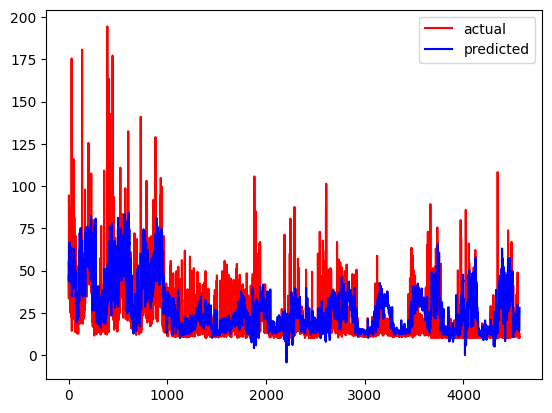

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
pred_comp_subset = pred_comp.head(100)
plt.plot(pred_comp['original'],label='actual',color='red')
plt.plot(pred_comp['predicted'],label='predicted',color='blue')
plt.legend()

**CNN-GRU**

In [ ]:
X=df_cleaned.drop(['AQI','City','Date','AQI_Bucket'],axis=1)
y=df_cleaned['AQI']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Flatten, RNN, SimpleRNN, LSTM
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(GRU(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=2)

Epoch 1/100
1145/1145 - 7s - loss: 4023.7200 - 7s/epoch - 6ms/step
Epoch 2/100
1145/1145 - 7s - loss: 471.8594 - 7s/epoch - 6ms/step
Epoch 3/100
1145/1145 - 5s - loss: 230.5092 - 5s/epoch - 5ms/step
Epoch 4/100
1145/1145 - 6s - loss: 153.4470 - 6s/epoch - 6ms/step
Epoch 5/100
1145/1145 - 6s - loss: 90.4688 - 6s/epoch - 5ms/step
Epoch 6/100
1145/1145 - 5s - loss: 56.7684 - 5s/epoch - 5ms/step
Epoch 7/100
1145/1145 - 7s - loss: 45.3416 - 7s/epoch - 6ms/step
Epoch 8/100
1145/1145 - 5s - loss: 42.0479 - 5s/epoch - 5ms/step
Epoch 9/100
1145/1145 - 7s - loss: 38.4839 - 7s/epoch - 6ms/step
Epoch 10/100
1145/1145 - 5s - loss: 30.8434 - 5s/epoch - 5ms/step
Epoch 11/100
1145/1145 - 7s - loss: 31.0834 - 7s/epoch - 6ms/step
Epoch 12/100
1145/1145 - 6s - loss: 30.6638 - 6s/epoch - 5ms/step
Epoch 13/100
1145/1145 - 6s - loss: 21.9442 - 6s/epoch - 5ms/step
Epoch 14/100
1145/1145 - 7s - loss: 22.7989 - 7s/epoch - 6ms/step
Epoch 15/100
1145/1145 - 5s - loss: 22.2829 - 5s/epoch - 5ms/step
Epoch 16/100
1

In [ ]:
test_preds = model.predict(X_test)
cg_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print("RMSE:", cg_rmse)

144/144 [==============================] - 1s 3ms/step
RMSE: 1.4094042133299418


In [ ]:
y_test_array = y_test.to_numpy()
y_test_reshaped = y_test_array.reshape(-1, 1)
y_test = pd.DataFrame(y_test_reshaped)
y_pred = pd.DataFrame(test_preds)
pred_comp = pd.concat([y_test,y_pred],axis=1)
pred_comp.columns=['original','predicted']
pred_comp

,original,predicted
0,409.0,407.465057
1,446.0,444.613922
2,18.0,17.988523
3,122.0,123.714760
4,39.0,37.834648
...,...,...
4574,288.0,289.246216
4575,59.0,59.583698
4576,74.0,74.541824
4577,59.0,59.662453


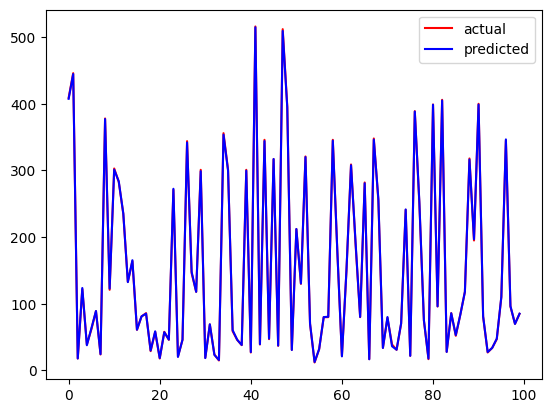

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
pred_comp_subset = pred_comp.head(100)
plt.plot(pred_comp_subset['original'],label='actual',color='red')
plt.plot(pred_comp_subset['predicted'],label='predicted',color='blue')
plt.legend()

**CNN-RNN**

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=2)

Epoch 1/100
1145/1145 - 6s - loss: 4657.3130 - 6s/epoch - 5ms/step
Epoch 2/100
1145/1145 - 5s - loss: 218.3023 - 5s/epoch - 5ms/step
Epoch 3/100
1145/1145 - 4s - loss: 81.5170 - 4s/epoch - 4ms/step
Epoch 4/100
1145/1145 - 4s - loss: 55.2318 - 4s/epoch - 4ms/step
Epoch 5/100
1145/1145 - 6s - loss: 44.0423 - 6s/epoch - 5ms/step
Epoch 6/100
1145/1145 - 4s - loss: 36.5351 - 4s/epoch - 4ms/step
Epoch 7/100
1145/1145 - 4s - loss: 29.7154 - 4s/epoch - 4ms/step
Epoch 8/100
1145/1145 - 6s - loss: 25.3908 - 6s/epoch - 5ms/step
Epoch 9/100
1145/1145 - 4s - loss: 25.3110 - 4s/epoch - 4ms/step
Epoch 10/100
1145/1145 - 4s - loss: 19.2031 - 4s/epoch - 4ms/step
Epoch 11/100
1145/1145 - 6s - loss: 19.2507 - 6s/epoch - 5ms/step
Epoch 12/100
1145/1145 - 4s - loss: 18.2574 - 4s/epoch - 4ms/step
Epoch 13/100
1145/1145 - 4s - loss: 17.2327 - 4s/epoch - 4ms/step
Epoch 14/100
1145/1145 - 6s - loss: 15.5603 - 6s/epoch - 5ms/step
Epoch 15/100
1145/1145 - 4s - loss: 14.5448 - 4s/epoch - 4ms/step
Epoch 16/100
114

In [ ]:
test_preds = model.predict(X_test)
cr_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print("RMSE:", cr_rmse)

144/144 [==============================] - 1s 2ms/step
RMSE: 2.7328006960400244


In [ ]:
y_test_array = y_test.to_numpy()
y_test_reshaped = y_test_array.reshape(-1, 1)
y_test = pd.DataFrame(y_test_reshaped)
y_pred = pd.DataFrame(test_preds)
pred_comp = pd.concat([y_test,y_pred],axis=1)
pred_comp.columns=['original','predicted']
pred_comp

,original,predicted
0,409.0,405.805023
1,446.0,442.460297
2,18.0,16.916691
3,122.0,119.492500
4,39.0,37.878235
...,...,...
4574,288.0,285.609924
4575,59.0,58.652126
4576,74.0,73.796906
4577,59.0,57.918335


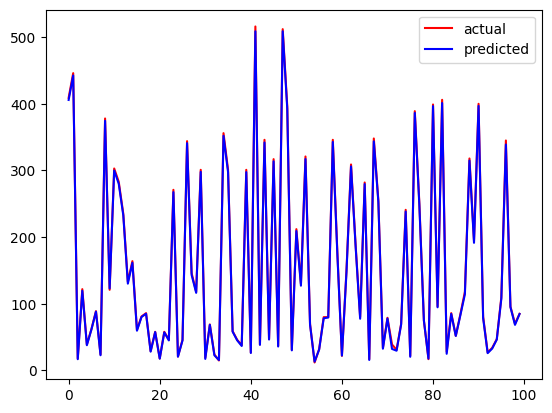

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
pred_comp_subset = pred_comp.head(100)
plt.plot(pred_comp_subset['original'],label='actual',color='red')
plt.plot(pred_comp_subset['predicted'],label='predicted',color='blue')
plt.legend()

**CNN-LSTM**

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=2)

Epoch 1/100
1145/1145 - 8s - loss: 3868.6663 - 8s/epoch - 7ms/step
Epoch 2/100
1145/1145 - 5s - loss: 341.4630 - 5s/epoch - 5ms/step
Epoch 3/100
1145/1145 - 7s - loss: 234.6149 - 7s/epoch - 6ms/step
Epoch 4/100
1145/1145 - 5s - loss: 128.3686 - 5s/epoch - 5ms/step
Epoch 5/100
1145/1145 - 7s - loss: 72.9713 - 7s/epoch - 6ms/step
Epoch 6/100
1145/1145 - 5s - loss: 53.9858 - 5s/epoch - 5ms/step
Epoch 7/100
1145/1145 - 6s - loss: 46.3989 - 6s/epoch - 5ms/step
Epoch 8/100
1145/1145 - 6s - loss: 34.2981 - 6s/epoch - 5ms/step
Epoch 9/100
1145/1145 - 5s - loss: 36.8361 - 5s/epoch - 5ms/step
Epoch 10/100
1145/1145 - 7s - loss: 33.0916 - 7s/epoch - 6ms/step
Epoch 11/100
1145/1145 - 5s - loss: 29.2735 - 5s/epoch - 5ms/step
Epoch 12/100
1145/1145 - 6s - loss: 24.5461 - 6s/epoch - 6ms/step
Epoch 13/100
1145/1145 - 6s - loss: 27.7858 - 6s/epoch - 5ms/step
Epoch 14/100
1145/1145 - 5s - loss: 23.9340 - 5s/epoch - 5ms/step
Epoch 15/100
1145/1145 - 7s - loss: 22.0522 - 7s/epoch - 6ms/step
Epoch 16/100
1

In [ ]:
test_preds = model.predict(X_test)
cl_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print("RMSE:", cl_rmse)

144/144 [==============================] - 1s 3ms/step
RMSE: 1.2861926310269063


In [ ]:
y_test_array = y_test.to_numpy()
y_test_reshaped = y_test_array.reshape(-1, 1)
y_test = pd.DataFrame(y_test_reshaped)
y_pred = pd.DataFrame(test_preds)
pred_comp = pd.concat([y_test,y_pred],axis=1)
pred_comp.columns=['original','predicted']
pred_comp

,original,predicted
0,409.0,409.730530
1,446.0,446.518158
2,18.0,16.905073
3,122.0,122.594528
4,39.0,38.714558
...,...,...
4574,288.0,288.177429
4575,59.0,60.285015
4576,74.0,74.495636
4577,59.0,59.017380


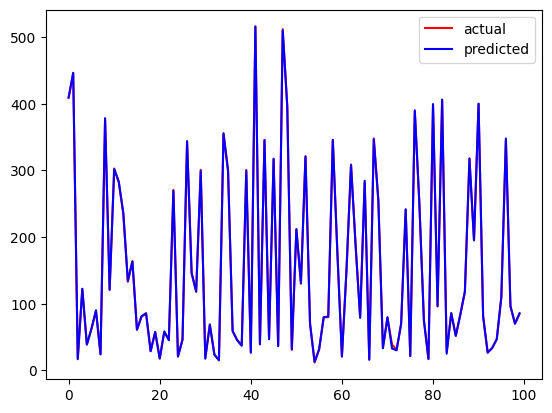

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
pred_comp_subset = pred_comp.head(100)
plt.plot(pred_comp_subset['original'],label='actual',color='red')
plt.plot(pred_comp_subset['predicted'],label='predicted',color='blue')
plt.legend()

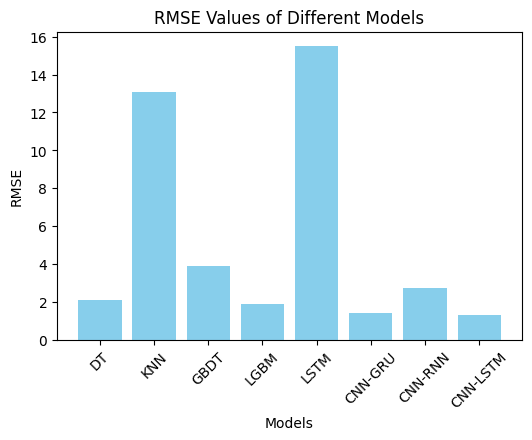

In [ ]:
import matplotlib.pyplot as plt
models = ['DT', 'KNN', 'GBDT', 'LGBM', 'LSTM', 'CNN-GRU', 'CNN-RNN', 'CNN-LSTM']
rmse_values = [dt_rmse, knn_rmse, gbdt_rmse, lgbm_rmse, lstm_rmse, cg_rmse, cr_rmse, cl_rmse]
plt.figure(figsize=(6, 4))
plt.bar(models, rmse_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Values of Different Models')
plt.xticks(rotation=45)
plt.show()
